# PROJETO QUE PREVER A PROBABILIDADE DE PACIENTES  CONTRAIR DIABETES

## INTRODUÇÃO
Em todo o planeta, o diabetes afeta cerca de 537 milhões de pessoas. Para chamar à atenção de toda a população e de profissionais de saúde sobre a importância da prevenção, do diagnóstico precoce e do controle adequado da doença que este trabalho se faz importante haja visto que a diabetes pode ser encarado como questão de saúde pública.
O diabetes atinge 10,2% da população brasileira, conforme dados da pesquisa Vigitel Brasil 2023 (Vigilância de Fatores de Risco e Proteção para Doenças Crônicas por Inquérito Telefônico). Índice representa aumento com relação a 2021, quando era 9,1%.Sendo assim, prevenir a doença através dos dados históricos de pacientes com análises de dados e modelagem preditiva se faz fundamental na luta e na redução de custos atrelado ao alto índices dos diagnósticos positivos. 

## Desafio proposto:

Dado o aumento de casos de diabetes no Brasil, um plano de saúde deseja fornecer opções de medicina preventiva para seus clientes.

Utilizando o histórico médico de alguns pacientes eles gostariam de saber quais são os com a maior **probabilidade de desenvolver diabetes**.

A ideia é que os médicos desenvolvam planos de ação para esses pacientes, para que o hospital possa reduzir seus custos em longo prazo já que prevenir a doença é mais barato do que seu tratamento e suas complicações, além de melhorar o bem estar de seus clientes.

In [212]:
# IMPORTANDO A PRINCIPAIS BIBLIOTECAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [213]:
# Lendo arquivo
df=pd.read_csv("medical_dataset.csv")
# observando qtdades de linhas e colunas
df.head()
df.shape

(952, 18)

In [214]:
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


## Características da base

 - Cada linha são dados referentes a uma pessoa
 - Nós temos uma marcação das pessoas que são diabéticas
 - Alguns dos dados categóricos já foram agrupados previamente, por exemplo _Age_ e _PhysicallyActive_ já estão divididas em alguns grupos
 - Observando os nomes das colunas também temos indícios que os dados selecionados previamente parecem  ser conhecidos como influentes no desenvolvimento da doença (provavelmente nessa etapa teríamos que buscar a informações mais relevantes para o nosso problema em parceria com um médico por exemplo)

In [215]:
# verificando a target
df['Diabetic'].value_counts(dropna=False)

no     684
yes    266
 no      1
NaN      1
Name: Diabetic, dtype: int64

A target possui problemas de digitação e variáveis nulas, resolvendo logo isso


In [216]:
# dropando os valores nulos
df.dropna(subset=['Diabetic'], inplace=True)


In [217]:
# renomeando a target
df['Diabetic'] = df.Diabetic.replace({' no': 'no'})

### Precisamos transformar a target  em binários '0' e '1' para modelagem

In [218]:
# Transformando em 0 e 1
df.Diabetic.replace(
    {
        'no' : 0,
        'yes' : 1
    },
    inplace=True
)

### Foi feito uma análise preliminar  das distribuições das variáveis e sua relação com a target

Foi observado as variáveis e suas relações , agora iniciaremos os preprocessamentos

In [219]:


#!pip install sweetviz

#import sweetviz as sv
#report = sv.analyze(df, target_feat='Diabetic')

#report.show_html('diabtes.html')
                                        
    



In [220]:
# verificando a target
display(df['Diabetic'].value_counts(dropna=False))
display(df.shape)

0    685
1    266
Name: Diabetic, dtype: int64

(951, 18)

### Baseados na informação sobre se a pessoa está ou não diabética, vamos tentar analisar quais os valores possíveis para os outros dados

In [221]:
# imprimindo valore único e verificando as variavéis
for col in df.columns:
    print(f'{col:30s}\t{df[col].unique()}')

Age                           	['50-59' '40-49' 'less than 40' '60 or older']
Gender                        	['Male' 'Female']
Family_Diabetes               	['no' 'yes']
highBP                        	['yes' 'no']
PhysicallyActive              	['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
BMI                           	[39. 28. 24. 23. 27. 21. 20. 26. 22. 15. 34. 30. 29. 18. 32. 31. 36. 38.
 40. 35. 19. 33. 17. 25. nan 42. 45.]
Smoking                       	['no' 'yes']
Alcohol                       	['no' 'yes']
Sleep                         	[ 8  6 10  7 11  9  4  5]
SoundSleep                    	[ 6  8 10  7 11  4  9  5  3  2  1  0]
RegularMedicine               	['no' 'yes' 'o']
JunkFood                      	['occasionally' 'very often' 'often' 'always']
Stress                        	['sometimes' 'not at all' 'very often' 'always']
BPLevel                       	['high' 'normal' 'low' 'Low' 'High' 'normal ']
Pregancies                    	[ 0.  1.  2

#### Observações

Existem outros dados com valores faltantes e que estão despadronizados. Precisamos nos lembrar de padronizar a forma como eles aparecem.

#### Note que

Em alguns casos, a padronização se deve , <u>aparentemente</u> erros de digitação, como na variável `Diabetic` temos os valores `'no'` e `' no'` (um espaço à esquerda).

Em outros, isso não é algo tão obvio assim, como por exemplo no campo `Pdiabetes` (histórico de diabete gestacional) possui valor `'0'` e `'no'`. O `'0'` significa que o indivíduo <u>não teve</u> diabetes gestacional, ou significa que <u>não sabemos</u>, ou seja, equivalente a um *valor faltante*?

Esse mesmo exemplo aparece no campo `BPLevel` com os valores `'Low'` e `'low'`. O variação na letra maiúscula é um erro de digitação, ou é, de fato, uma escala para indicar "muito baixo" e "baixo"?

<br/>
<div style="border-style: solid; border-width:1px; border-color: black; text-align:center; padding: 10px; padding-bottom:20px;">
    <h3>Por isso é sempre <u>fundamental</u> ter contato próximo com a área de negócio para entender o que significam os possíveis valores dos dados!</h3>
</div>

## Estratégia



- Na descrição do problema foi dito que **eles querem uma probabilidade** (podemos validar com o negócio se isso de fato é necessário)
- Assim, podemos usar um modelo que <u>retorne uma probabilidade de fato</u> ou transformar os escores em probabilidades no final (calibração de modelos)
  - Seguindo a estratégia de <u>começar pelo mais simples</u> para que não precisemos realizar a etapa de calibração, vamos começar com um modelo de **Regressão Logística**
  - Note que praticamente todas variáveis são **categóricas**: Isso facilita nossa prepração para a Regressão Logística!
- Apesar de não ter sido solicitado, nesse caso <u>pode ser interessante que possamos **interpretar**</u> as decisões do modelo, assim podemos validar e avaliar se as categorias estão fazendo sentido

In [222]:
# verificando as médias dados nulos 
df.isnull().mean()

Age                 0.000000
Gender              0.000000
Family_Diabetes     0.000000
highBP              0.000000
PhysicallyActive    0.000000
BMI                 0.003155
Smoking             0.000000
Alcohol             0.000000
Sleep               0.000000
SoundSleep          0.000000
RegularMedicine     0.000000
JunkFood            0.000000
Stress              0.000000
BPLevel             0.000000
Pregancies          0.044164
Pdiabetes           0.001052
UriationFreq        0.000000
Diabetic            0.000000
dtype: float64

temos pouco dados nulos , mas iremos investigar

## Vamos analisar como fica e quais são os valores possíveis das variáveis com missings e que apresentaram diferentes padrões

In [223]:
#verificando as variáveis que fazem sentido ao problema

colunas= ['Pregancies', 'Pdiabetes','BMI','PhysicallyActive','RegularMedicine','BPLevel']

for col in colunas:
    
    print(col,
          '\n',
          df[col].value_counts(normalize=True, dropna=False),
          '\n',
          '_________________________________________________'
          
    
    
    
    )

Pregancies 
 0.0    0.791798
2.0    0.067298
3.0    0.063091
NaN    0.044164
1.0    0.029443
4.0    0.004206
Name: Pregancies, dtype: float64 
 _________________________________________________
Pdiabetes 
 0      0.983176
yes    0.014721
NaN    0.001052
no     0.001052
Name: Pdiabetes, dtype: float64 
 _________________________________________________
BMI 
 24.0    0.116719
21.0    0.092534
23.0    0.079916
28.0    0.074658
26.0    0.069401
33.0    0.067298
27.0    0.066246
22.0    0.060988
20.0    0.050473
19.0    0.037855
25.0    0.035752
30.0    0.034700
18.0    0.033649
29.0    0.029443
38.0    0.029443
36.0    0.021030
17.0    0.016824
32.0    0.016824
31.0    0.016824
34.0    0.012618
35.0    0.012618
15.0    0.008412
39.0    0.004206
40.0    0.004206
NaN     0.003155
42.0    0.003155
45.0    0.001052
Name: BMI, dtype: float64 
 _________________________________________________
PhysicallyActive 
 less than half an hr    0.353312
more than half an hr    0.284963
one hr or more    

In [224]:
# analizando a target
df['Diabetic'].value_counts(normalize=True,dropna=False,)

0    0.720294
1    0.279706
Name: Diabetic, dtype: float64

## PADRONIZANDO AS VARIÁVEIS

In [225]:
# tirando espaços desnecessários
df.Pregancies.replace({' 0.0': '0.0'}, inplace=True,)

In [226]:
df.Pregancies.value_counts(dropna=False)

0.0    753
2.0     64
3.0     60
NaN     42
1.0     28
4.0      4
Name: Pregancies, dtype: int64

In [227]:
# chamando os "0" de desconhecidos
df.Pdiabetes.replace({'0':'unknown'}, inplace=True)

# ubstitui os ausentes por desconhecidos
df.Pdiabetes.fillna('unknown', inplace= True)

# contagem dos valores
df.Pdiabetes.value_counts(dropna=True, normalize= True)

unknown    0.984227
yes        0.014721
no         0.001052
Name: Pdiabetes, dtype: float64

In [228]:
#renomeando erros de digitação
df.BPLevel.replace(
    {
        'High' : 'high',
        'Low' : 'low',
        ' normal' : 'normal',
        'normal ' : 'normal',
    },
    inplace=True
)

In [229]:
# fazendo as contagens
df.BPLevel.value_counts(normalize=True, dropna=False)

normal    0.743428
high      0.227129
low       0.029443
Name: BPLevel, dtype: float64

In [230]:
df.RegularMedicine.replace(
    {'o': 'no',
    ' no': 'no',
    },
    inplace=True)

In [231]:
# fazendo as contagens
df.RegularMedicine.value_counts(normalize=True, dropna=False)

no     0.646688
yes    0.353312
Name: RegularMedicine, dtype: float64

## Já foi analisado as variáveis , mas irei observar com mais rigor  o comportamento das variáveis numéricas

In [232]:
#lendo arquivo
df.head(3)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,unknown,not much,0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,unknown,not much,0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,unknown,not much,0


In [233]:
#observando os tipos de variáveis
df.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic              int64
dtype: object

### Vamos analisar rapidamente as numéricas

## BMI

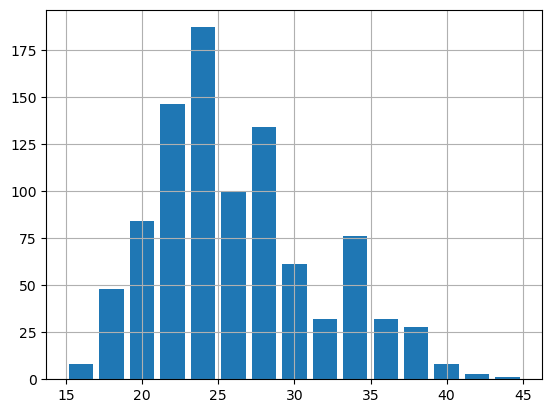

In [234]:
# Criando histograma BMI
df.BMI.hist(bins=15, rwidth=.8);


Existem uma concentração entre 20 e 25 anos

### Vamos observar o BMI em relação ao diabéticos e não diabéticos

Text(0, 0.5, 'Frequência')

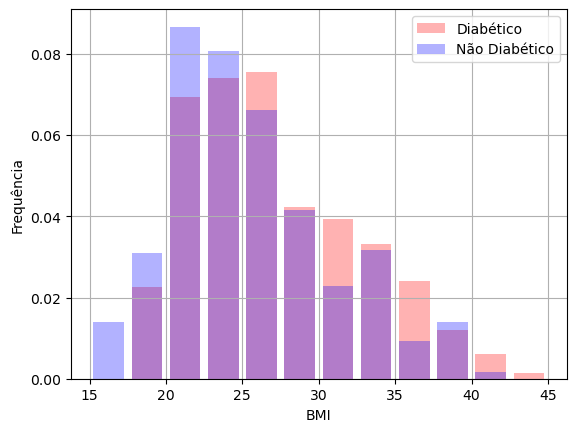

In [235]:
# relação do bmi e dibeticos e não diabéticos

df.loc[df.Diabetic==1]['BMI'].hist(bins=np.arange(15,45.1,2.5), rwidth=.8, color='r', alpha=.3,  density=True, label='Diabético')
df.loc[df.Diabetic==0]['BMI'].hist(bins=np.arange(15,45.1,2.5), rwidth=.8, color='b', alpha=.3, density=True, label='Não Diabético')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Frequência')

Parece que o BMI é um dado interessante a investigar os casos de dibéticos

## SoundSleep

<Axes: >

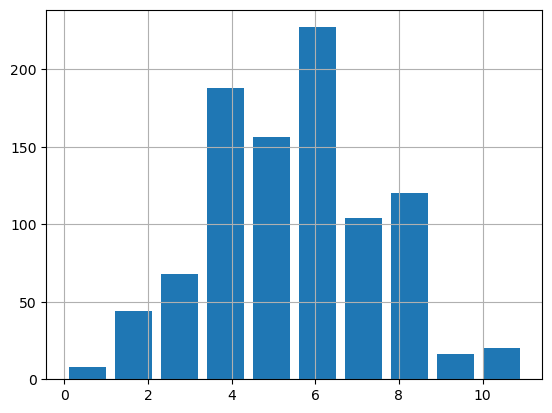

In [236]:
# Observando a distrbuição da variavel qualidade do sono
df['SoundSleep'].hist(bins=10, rwidth=.8)

Concentração de sono tranquilo entre 4 e 6 horas

Text(0, 0.5, 'frequencia')

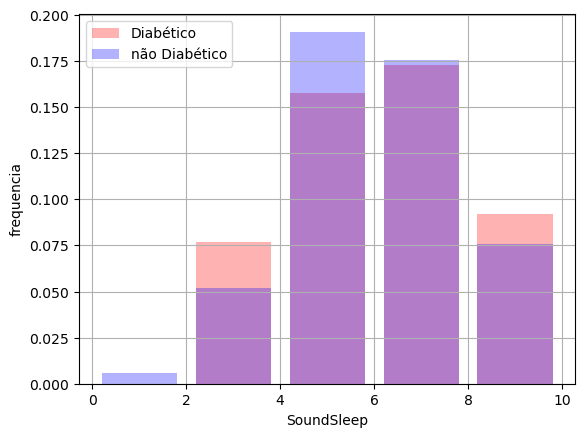

In [237]:
# observando a qualidade do sono nos casos diabético e não diabéticos
df.loc[df['Diabetic']==1]['SoundSleep'].hist(bins=np.arange(0, 11.5,2), rwidth=.8, color='r', alpha=.3,  density=True, label='Diabético')
df.loc[df['Diabetic']==0]['SoundSleep'].hist(bins=np.arange(0, 11.5,2), rwidth=.8, color='b', alpha=.3,  density=True, label='não Diabético')
plt.legend()
plt.xlabel('SoundSleep')
plt.ylabel('frequencia')

Parece que as horas de sono profundo não intefere no quadro de diabetes

## Pregancies

<Axes: >

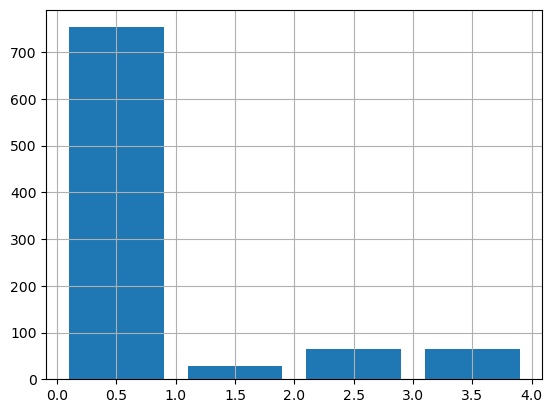

In [238]:
# Verificando a distribuição das gestão
df['Pregancies'].hist(bins=4, rwidth=.8)

Esse número elevado de zero possa ser  sexo masculino, é preciso analisar por gênero feminino

## Vamos observar a gestão apenas nos gênero feminino

Observando apenas os femininos houve diminuição dos número de zeros

<Axes: >

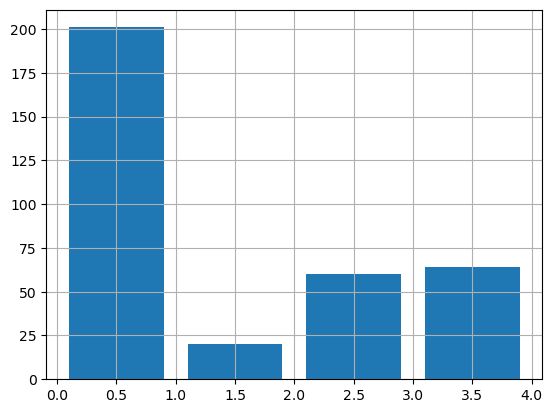

In [239]:
# Verificando o sexo feminino
df.loc[df.Gender=='Female']['Pregancies'].hist(bins=np.arange(0,4.1,1), rwidth=.8)

###  Vamos analisar as gestações nos caso de diabetes?

Text(0, 0.5, 'frequencia')

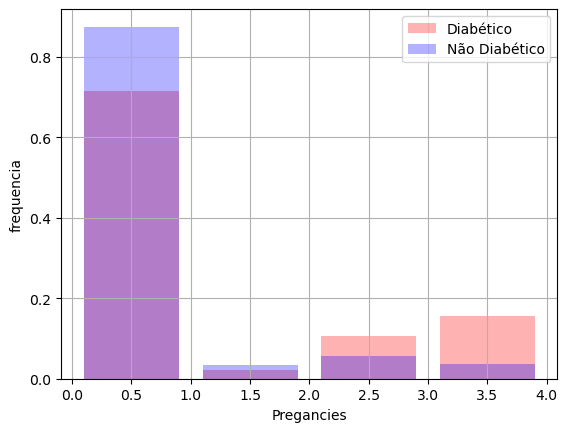

In [240]:
# Numero de diabeticos e não dibeticos por gestação
df.loc[df.Diabetic==1]['Pregancies'].hist(bins=np.arange(0, 4.1,1), rwidth=.8, color='r', alpha=.3,  density=True, label='Diabético')
df.loc[df.Diabetic==0]['Pregancies'].hist(bins=np.arange(0, 4.1,1), rwidth=.8, color='b', alpha=.3,  density=True, label='Não Diabético')
plt.legend()
plt.xlabel('Pregancies')
plt.ylabel('frequencia')

Aqui percebe-se que mulheres acima de 2 gestação tem mais incidência à diabétes,mas é preciso verificar apenas o publico feminino

### Aqui existem umm problema, temos que observar apenas gestão nos grupo feminino

Text(0, 0.5, 'frequencia')

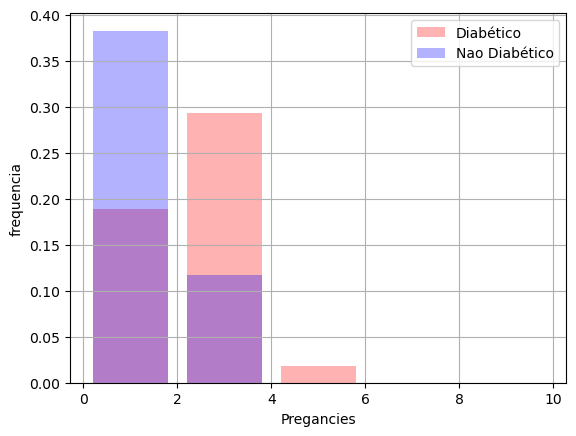

In [241]:
# Observando as gestão apenas no grupo feminino
df.loc[(df.Diabetic==1) & (df.Gender=='Female')]['Pregancies'].hist(bins=np.arange(0, 11.1,2), rwidth=.8, color='r', alpha=.3,  density=True, label='Diabético')
df.loc[(df.Diabetic==0) & (df.Gender=='Female')]['Pregancies'].hist(bins=np.arange(0, 11.1,2), rwidth=.8, color='b', alpha=.3,  density=True, label='Nao Diabético')
plt.legend()
plt.xlabel('Pregancies')
plt.ylabel('frequencia')

Hipótese confirmada quanto maior o número de gestação, maior o risco de diabétes, pode ser uma diabetes gestacional

<Axes: >

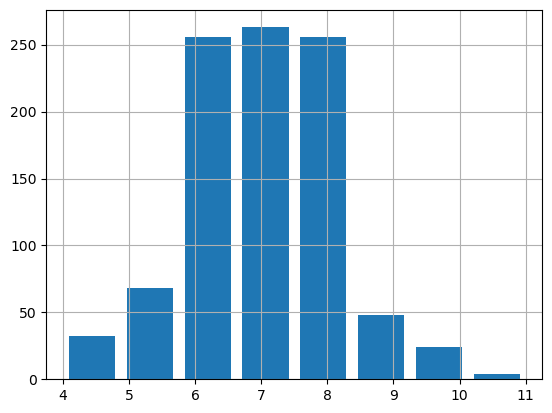

In [242]:
# Verificando o sono
df['Sleep'].hist(bins=8, rwidth=.8)

De 6 a 8 horas de sono

Text(0, 0.5, 'frequencia')

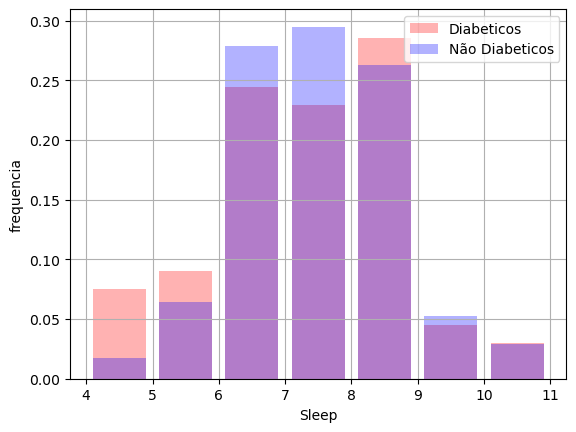

In [243]:
# Verificando o sono nos casos de diabéticos e não diabéticos
df.loc[df.Diabetic==1]['Sleep'].hist(bins=np.arange(4,11.1,1), rwidth=.8, color='r', alpha=.3, density=True,label='Diabeticos')
df.loc[df.Diabetic==0]['Sleep'].hist(bins=np.arange(4,11.1,1), rwidth=.8, color='b', alpha=.3, density=True,label='Não Diabeticos')
plt.legend()
plt.xlabel('Sleep')
plt.ylabel('frequencia')

Parece que  o sono tem relação com o quadro de diabetes

In [244]:
# verificando os nulos 
df.isna().any()

Age                 False
Gender              False
Family_Diabetes     False
highBP              False
PhysicallyActive    False
BMI                  True
Smoking             False
Alcohol             False
Sleep               False
SoundSleep          False
RegularMedicine     False
JunkFood            False
Stress              False
BPLevel             False
Pregancies           True
Pdiabetes           False
UriationFreq        False
Diabetic            False
dtype: bool

In [245]:
# observando o dataset novamente
df.head(2)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,unknown,not much,0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,unknown,not much,0


## Vamos dividir em treino e teste

In [246]:
# dividindo em treino e teste

from sklearn.model_selection import train_test_split

X = df.drop('Diabetic', axis=1)
y = df['Diabetic']

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.3, random_state=13, )

In [247]:
print(f' X_treino é', X_tr.shape)
print(f' X_teste é', X_ts.shape)
print(f'Y_teste é',y_ts .shape)
print(f'Y_treino é', y_tr.shape)

 X_treino é (665, 17)
 X_teste é (286, 17)
Y_teste é (286,)
Y_treino é (665,)


# Preenchimento de valores missing

Lembrando que os valores do conjunto teste simulam os dados do mundo real em que o modelo nunca viu onde será aplicado, ou seja, dados que eu não teria no momento de preencher/analisar as informações dos valores faltantes. Isso é importante para termos uma noção da performance do modelo nos dados reais.

Assim, o mais correto é sempre analisarmos e utilizarmos (por exemplo para o cálculo das médias, medianas, moda e etc...) para preenchimento de missings os __dados de treino__ e usar essa informação para preenchimento de valores faltantes __no treino e no teste__, isso evitará vazamento de dados

#### Começando com a variável BMI (Índice de Massa Corporal - IMC)

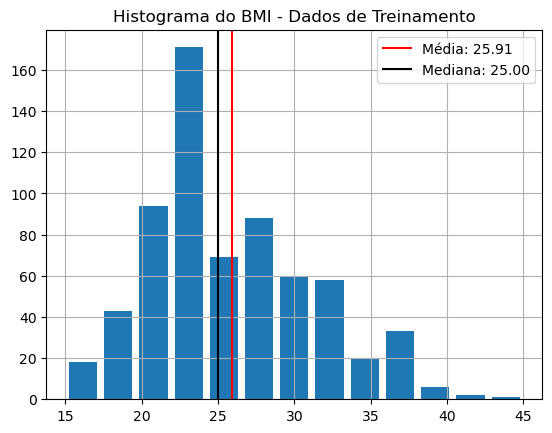

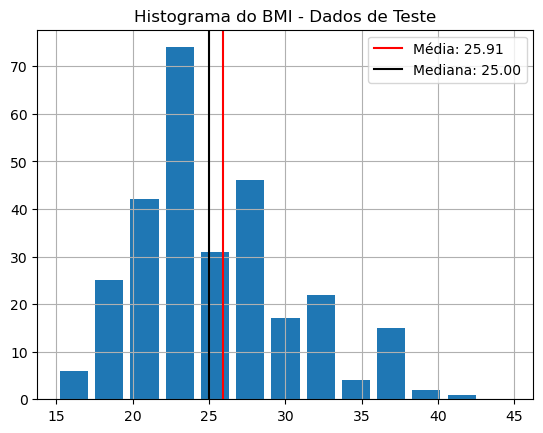

In [248]:
# plotando gráfico da distribuição das médias e mediana 
bins = np.linspace(X_tr.BMI.min(),X_tr.BMI.max(),14)

# dados de treino
plt.figure()
plt.title('Histograma do BMI - Dados de Treinamento')
X_tr.BMI.hist(bins=bins, rwidth=.8)
mean_value = X_tr.BMI.mean()
median_value = X_tr.BMI.median()
plt.axvline(mean_value, color='r', label=f'Média: {mean_value:.2f}')
plt.axvline(median_value, color='k', label=f'Mediana: {median_value:.2f}')
plt.legend()


# dados teste
plt.figure()
plt.title('Histograma do BMI - Dados de Teste')
X_ts.BMI.hist(bins=bins, rwidth=.8)
mean_value = X_tr.BMI.mean()
median_value = X_tr.BMI.median()
plt.axvline(mean_value, color='r', label=f'Média: {mean_value:.2f}')
plt.axvline(median_value, color='k', label=f'Mediana: {median_value:.2f}')
plt.legend()

Aqui percebemos que a média e a mediana, estão muito parecidas tanto nos dados de teste quanto de treino, então tanto faz escolher a média ou a mediana

#### Assim, para BMI escolhemos utilizar a mediana no preenchimento de NaN

In [249]:
# imputando a mediana nos dados de treino e teste
X_tr.BMI.fillna(X_tr.BMI.median(), inplace=True, )
X_ts.BMI.fillna(X_tr.BMI.median(), inplace=True, )

<Axes: >

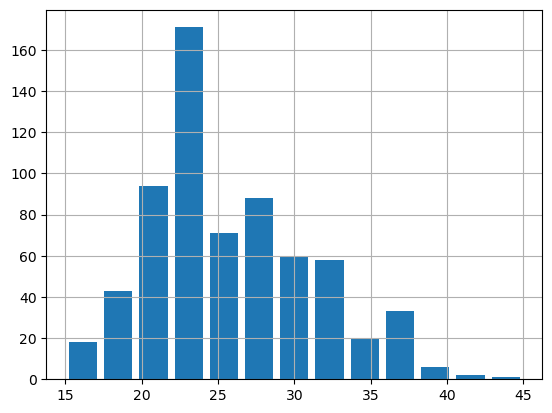

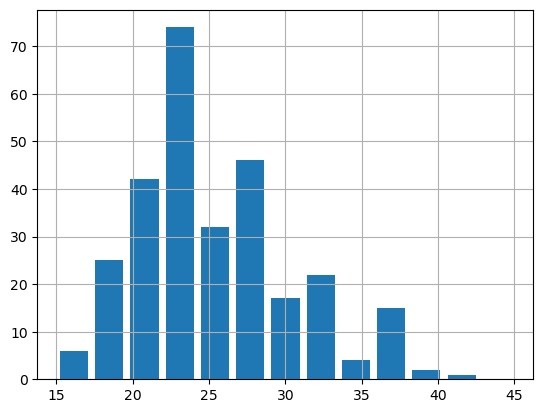

In [250]:
# Observando as distribuição depois da imputação
bins = np.linspace(X_tr.BMI.min(),X_tr.BMI.max(),14)
# dados treino
plt.figure()
X_tr.BMI.hist(bins=bins, rwidth=.8)
#dados teste
plt.figure()
X_ts.BMI.hist(bins=bins, rwidth=.8)

In [251]:
#obsevando dados de treino
X_tr.BMI.value_counts(dropna=False)

24.0    81
21.0    63
23.0    49
26.0    47
28.0    45
33.0    44
27.0    43
22.0    41
20.0    31
30.0    24
25.0    24
29.0    24
19.0    23
38.0    20
18.0    20
32.0    14
17.0    14
36.0    13
31.0    12
34.0    10
35.0    10
40.0     4
15.0     4
42.0     2
39.0     2
45.0     1
Name: BMI, dtype: int64

In [252]:
# Observando dados de teste
X_ts.BMI.value_counts(dropna=False)

24.0    30
23.0    27
28.0    26
21.0    25
33.0    20
27.0    20
26.0    19
22.0    17
20.0    17
19.0    13
25.0    13
18.0    12
30.0     9
38.0     8
36.0     7
31.0     4
29.0     4
15.0     4
17.0     2
35.0     2
32.0     2
34.0     2
39.0     2
42.0     1
Name: BMI, dtype: int64

### Ao observar a variável PREGANCIES, A maioria dos valores são de '0', então usaremos a estratégia de imputação por MODA, ou seja, valores mais frequentes

In [253]:
# Observando a variavel gestação no treino
X_tr.Pregancies.value_counts(dropna=False, normalize=True)

0.0    0.780451
2.0    0.072180
3.0    0.066165
NaN    0.043609
1.0    0.033083
4.0    0.004511
Name: Pregancies, dtype: float64

In [254]:
# observando a variavel gestação no teste
X_ts.Pregancies.value_counts(dropna=False, normalize=True)

0.0    0.818182
3.0    0.055944
2.0    0.055944
NaN    0.045455
1.0    0.020979
4.0    0.003497
Name: Pregancies, dtype: float64

In [255]:
# calculandoa moda
moda = X_tr.Pregancies.mode().values[0]
print('Moda:', moda)

Moda: 0.0


In [256]:
# imputando a moda nos dados de treino e teste
X_tr.Pregancies.fillna(0, inplace=True,)
X_ts.Pregancies.fillna(0, inplace=True,)

In [257]:
X_tr.Pregancies.value_counts(dropna=False, normalize=True)

0.0    0.824060
2.0    0.072180
3.0    0.066165
1.0    0.033083
4.0    0.004511
Name: Pregancies, dtype: float64

 valores missing imputados na proporção nos dados de teste e treino

In [258]:
X_ts.Pregancies.value_counts(dropna=False, normalize=True)

0.0    0.863636
3.0    0.055944
2.0    0.055944
1.0    0.020979
4.0    0.003497
Name: Pregancies, dtype: float64

### Ao observar a variável PDIABETES, verifiquei que existem um "NO" nos dados de testes, e uma única vez, irei tratar como desconhecidos

In [259]:
# verificando dados de treino
X_tr.Pdiabetes.value_counts(dropna=False)

unknown    656
yes          9
Name: Pdiabetes, dtype: int64

In [260]:
# dados de teste
X_ts.Pdiabetes.value_counts(dropna=False)

unknown    280
yes          5
no           1
Name: Pdiabetes, dtype: int64

In [261]:
# transformando 'no' em desconhecidos
X_ts.Pdiabetes.replace('no','unknown', inplace=True)

In [262]:
# dados de teste
X_ts.Pdiabetes.value_counts(dropna=False)

unknown    281
yes          5
Name: Pdiabetes, dtype: int64

Observe que conseguimos tratar de forma correta a variável Pdiabetes nos dados de treino

### Vamos checar se sobraram valores faltantes nos dados tanto de treino como de teste!

In [263]:
# Observando nuos no teste
X_ts.isnull().mean()

Age                 0.0
Gender              0.0
Family_Diabetes     0.0
highBP              0.0
PhysicallyActive    0.0
BMI                 0.0
Smoking             0.0
Alcohol             0.0
Sleep               0.0
SoundSleep          0.0
RegularMedicine     0.0
JunkFood            0.0
Stress              0.0
BPLevel             0.0
Pregancies          0.0
Pdiabetes           0.0
UriationFreq        0.0
dtype: float64

In [264]:
#Observando nuos no treino 
X_tr.isnull().mean()

Age                 0.0
Gender              0.0
Family_Diabetes     0.0
highBP              0.0
PhysicallyActive    0.0
BMI                 0.0
Smoking             0.0
Alcohol             0.0
Sleep               0.0
SoundSleep          0.0
RegularMedicine     0.0
JunkFood            0.0
Stress              0.0
BPLevel             0.0
Pregancies          0.0
Pdiabetes           0.0
UriationFreq        0.0
dtype: float64

Os dados faltantes foram devidamente tratados

In [265]:
# verificando dataset 
df.head(4)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,unknown,not much,0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,unknown,not much,0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,unknown,not much,0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,unknown,not much,0


In [266]:
# Observando os tipos das variáveis
df.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic              int64
dtype: object

## Encoding de variaveis categóricas

Como vimos, muitos de nossas variáveis são categóricas. Dessa forma precisamos fazer um encoding  para que o modelo possa entender e trabalhar com esses dados. 

In [267]:
# selecionando as variáveis categóricas
features_one_hot = X_tr.select_dtypes(include=['object'])

#features_one_hot = ['Age', 'Gender', 'Family_Diabetes', 'PhysicallyActive', 'highBP', 'Smoking', 'Alcohol', 'RegularMedicine', 'JunkFood', 'Stress', 'Pdiabetes', 'BPLevel', 'UriationFreq']

for f in features_one_hot:
    print(f,":", df[f].nunique())

Age : 4
Gender : 2
Family_Diabetes : 2
highBP : 2
PhysicallyActive : 4
Smoking : 2
Alcohol : 2
RegularMedicine : 2
JunkFood : 4
Stress : 4
BPLevel : 3
Pdiabetes : 3
UriationFreq : 2


Como as variáveis categoricas têm categorias pequenas entre 4 e 6 número máximo, podemos usar o onehotencoding, caso contrário, caso tivessemos muitas quantidades de  categorias, poderiamos usar outro tipo de encoding

#### Note que

Como vamos usar como modelo uma **Regressão Logística**, transformar as colunas categóricas via OneHotEncoding permite que saibamos o <u>impacto de cada categoria no score</u>, pela análise dos $\beta$

In [268]:
# Buscando variáveis numéricas
numerical_features=list(set(X_tr.columns)-set(features_one_hot))
numerical_features = numerical_features

In [269]:
numerical_features

['Sleep', 'SoundSleep', 'BMI', 'Pregancies']

#### Nota:

Lembre-se que a **Regressão Logística** possui problemas com **multicolinearidade**, isto é, com uma variável que é gerada a partir das outras por uma simples combinação de constantes.

Assim, ao fazer o OneHotEncoding, **precisamos descartar uma das colunas**.

Fazemos isso com o parâmetro `drop='first`

In [270]:
from sklearn.preprocessing import OneHotEncoder

encoders = {}
dropped = {}
X_tr_encoded = X_tr.copy()
X_ts_encoded = X_ts.copy()
for col in features_one_hot:
    encoders[col] = OneHotEncoder(sparse_output=False, drop='first')
    encoders[col].fit(X_tr[[col]])
    
    dropped[col] = encoders[col].categories_[0][0]
    new_cols = [f'{col}_{cat}' for cat in encoders[col].categories_[0][1:]]
    
    X_tr_loc = pd.DataFrame(encoders[col].transform(X_tr[[col]]), index=X_tr.index, columns=new_cols)
    X_tr_encoded = X_tr_encoded.drop(col,axis=1)
    X_tr_encoded = X_tr_encoded.join(X_tr_loc)
    
    X_ts_loc = pd.DataFrame(encoders[col].transform(X_ts[[col]]), index=X_ts.index, columns=new_cols)
    X_ts_encoded = X_ts_encoded.drop(col,axis=1)
    X_ts_encoded = X_ts_encoded.join(X_ts_loc)

### Aqui são as variáveis dropadas com o parâmetro drop='first, 

In [271]:
# colunas dropada
dropped

{'Age': '40-49',
 'Gender': 'Female',
 'Family_Diabetes': 'no',
 'highBP': 'no',
 'PhysicallyActive': 'less than half an hr',
 'Smoking': 'no',
 'Alcohol': 'no',
 'RegularMedicine': 'no',
 'JunkFood': 'always',
 'Stress': 'always',
 'BPLevel': 'high',
 'Pdiabetes': 'unknown',
 'UriationFreq': 'not much'}

## Aqui são os dados de treino e de teste com o encoding

In [272]:
# dados de treino com encodig
X_tr_encoded

,BMI,Sleep,SoundSleep,Pregancies,Age_50-59,Age_60 or older,Age_less than 40,Gender_Male,Family_Diabetes_yes,highBP_yes,...,JunkFood_occasionally,JunkFood_often,JunkFood_very often,Stress_not at all,Stress_sometimes,Stress_very often,BPLevel_low,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often
260,24.0,4,4,3.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
643,33.0,7,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
97,24.0,8,5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
392,33.0,7,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
258,30.0,9,8,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,18.0,6,6,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
529,26.0,8,6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
74,31.0,7,6,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,33.0,8,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [273]:
## dados de teste com encodig
X_ts_encoded

,BMI,Sleep,SoundSleep,Pregancies,Age_50-59,Age_60 or older,Age_less than 40,Gender_Male,Family_Diabetes_yes,highBP_yes,...,JunkFood_occasionally,JunkFood_often,JunkFood_very often,Stress_not at all,Stress_sometimes,Stress_very often,BPLevel_low,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often
334,20.0,6,6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
434,24.0,6,5,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
461,33.0,7,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
375,26.0,7,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
902,25.0,7,5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,21.0,8,4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
914,20.0,7,4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
68,23.0,5,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
710,27.0,6,5,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Sobre a <u>escala</u> das variáveis

No uso da **Regressão Logística** temos uma <u>escolha</u> em termos da escala das variáveis

 - Caso escalemos as variáveis
   - Os $\beta$s passam a ser comparáveis, ou seja, se uma variável possui um $\beta$ **maior em módulo**, quer dizer que ela é **mais relevante para a classificação**
   - Entretanto a interpretação fica mais difícil, pois o $\beta$ multiplica uma variável em uma escala diferente da original
   
Nessa análise optaremos por **não** escalar as variáveis.

## TREINAMENTO DE MODELOS

Uma boa estratégia a se seguir é a de testar modelos mais simples primeiro, e irmos aumentando a complexidade caso necessário.

Como citamos anteriormente, uma boa escolha neste caso poderia ser uma regressão logítica:

 - Ela é interpretável (isso sempre é bom, mesmo quando o problema não tem essa demanda)
 - É um modelo simples de explicar para os usuários
 - Retorna probabilidades (estava na descrição do problema)
 
Dessa forma vamos iniciar com ela

 - penalty='none': O parâmetro penalty controla a regularização aplicada ao modelo de regressão logística. Quando definido como 'none', isso significa que nenhuma regularização está sendo aplicada. A regularização é usada para evitar overfitting, mas ao definir penalty como 'none', o modelo não está sujeito a nenhuma penalização nas ponderações, tornando-o uma regressão logística simples sem regularização.

- random_state=61658: O parâmetro random_state é usado para definir a semente aleatória, o que garante que os resultados sejam reproduzíveis. Ao definir um valor fixo, como 61658, o modelo gerará os mesmos resultados sempre que for ajustado aos mesmos dados. Isso é útil para fins de reprodutibilidade.

- max_iter=3_000: O parâmetro max_iter controla o número máximo de iterações que o otimizador utilizará para encontrar os parâmetros do modelo. Neste caso, o valor é definido como 3.000, o que significa que o otimizador tentará encontrar os parâmetros do modelo em até 3.000 iterações. Isso é importante para garantir que o otimizador tenha tempo suficiente para convergir para uma solução, especialmente se o problema for complexo.

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


clf = LogisticRegression(penalty=None, random_state=61658, max_iter=3_000)

A variável scores conterá uma lista com os valores da métrica ROC AUC calculados para cada uma das 10 dobras da validação cruzada. Esses valores podem ser usados para avaliar o desempenho do modelo e, por exemplo, calcular a média ou o desvio padrão da métrica para obter uma medida geral do desempenho do modelo.

In [275]:
# avaliando o medelo
scores = cross_val_score(clf, X_tr_encoded, y_tr, cv=10, scoring='roc_auc')

print(f"O valor médio da AUC foi de {scores.mean():.2f} com devio padrão de {scores.std():.2f}")

O valor médio da AUC foi de 0.94 com devio padrão de 0.04


## Sugestão

Como o valor da métrica de comparação do modelo já ficou bastante bom, nós podemos utilizar o modelo com os hyperparâmetros default (definindo apenas o random_state) - lembrando que a regressão logística não possui nenhum parâmetro que podem levar a problemas, como por exemplo o overfiting que pode acontecer com árvores profundas.

Outra opção seria realizar um  GridSearchCV no modelo, buscando no espaço de hyperparâmetros que retornem valores um pouco melhores de médio de AUC.

No caso o método corr_val_score não retorna o modelo já fitado, então precisamos fitar o modelo dessa forma.
Ainda, como a variação da AUC não foi grande entre os folds e o valor médio foi bom nós podemos utilizar todo o conjunto para treino para ter uma noção da performance do modelo no mundo real. 

In [276]:
# treinando o modelo
clf.fit(X_tr_encoded, y_tr)

# criando o dataframe
y_ts_df = pd.DataFrame(y_ts)

# criando as predições
y_ts_df.loc[:,'pred'] = clf.predict_proba(X_ts_encoded)[:,1]
y_ts_df

,Diabetic,pred
334,1,0.050753
434,0,0.019757
461,1,0.636583
375,0,0.000009
902,0,0.016321
...,...,...
833,0,0.957375
914,0,0.002846
68,1,0.919457
710,1,0.993821


Aqui criamos um dataframe com as predições de probabilidades de ser diabéticos '1'

In [277]:
# os preditos sem probabilidades sãoa apenas scores do modelos
#y_pred = clf.predict(X_ts_encoded)[:,1]

### Como os scores ficaram para cada uma das classes?

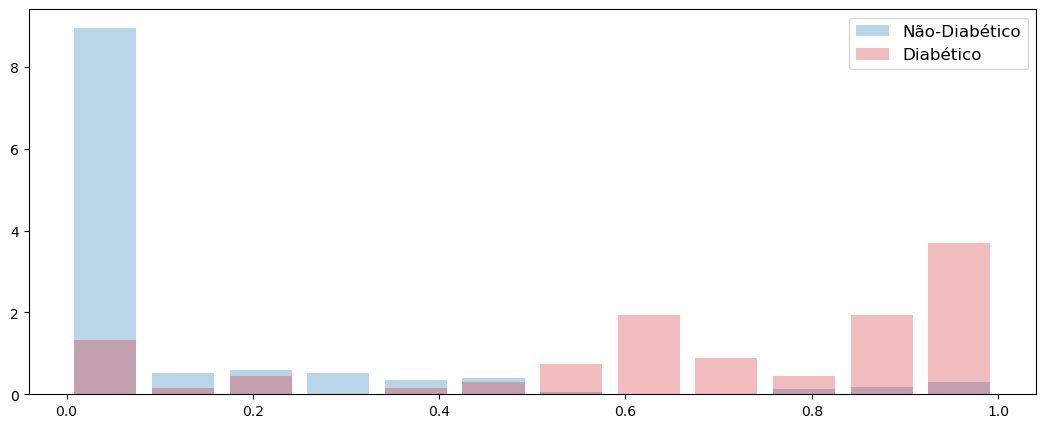

In [278]:
# Gráfico dos predito diabético e não diabéticos

plt.figure(figsize=(13,5))
plt.hist(y_ts_df.loc[y_ts_df.Diabetic==0].pred,bins=np.linspace(0,1,13), color='C0', alpha=.3, density=True, rwidth=.8,label='Não-Diabético')
plt.hist(y_ts_df.loc[y_ts_df.Diabetic==1].pred,bins=np.linspace(0,1,13), color='C3', alpha=.3, density=True, rwidth=.8,label='Diabético')
plt.legend(fontsize=12)

## Aqui já percebemos que probabilidades de acima de 50% todos os pacientes tendem a ser diabéticos, iremos investigar mais profundamente.

### Vamos verificar a curva ROC?


In [279]:
from sklearn.metrics import roc_curve, roc_auc_score

print('AUC -', roc_auc_score(y_ts_df.Diabetic, y_ts_df.pred))

AUC - 0.9195121951219511


Text(0, 0.5, 'Taxa de Verdadeiros Positivos')

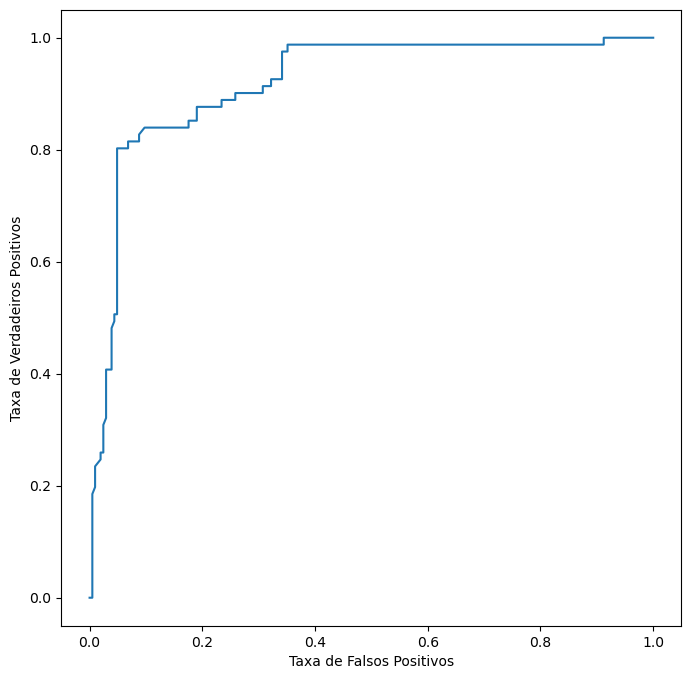

In [280]:
# Plotando grafico da curva ROC
fpr, tpr, ths = roc_curve(y_ts_df.Diabetic, y_ts_df.pred)

plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

### Ao limiar de 0,8 o modelo tem uma taxa de acerto alto levando em consideração os verdadeiros positivos, mas isso é uma  decisão de negócio

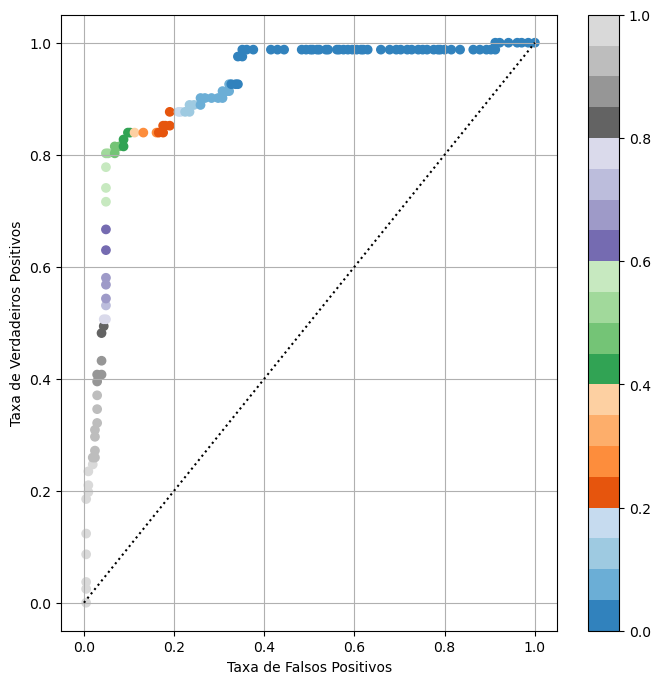

In [281]:
fpr, tpr, ths = roc_curve(y_ts_df.Diabetic, y_ts_df.pred)

plt.figure(figsize=(8,8))
plt.scatter(fpr,tpr,c=ths, vmin=0, vmax=1, cmap='tab20c')
plt.plot((0,1),(0,1),'k:')
plt.colorbar()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.grid();

### Discussão: Como otimizar o limiar?

A **AUC/ROC** nos dá uma medida <u>geral</u> sobre a performance do modelo.

Mas, no fim do dia, **precisamos contactar alguns clientes com a opções de medicina preventiva**, enquanto outros **não são contactados**:

 - Se contactássemos todos, entraríamos em contato com muitos clientes não propensos desnecessariamente, gerando custos desnecessários
   - Além disso, se falamos com <u>todo mundo</u>, não precisamos de modelo!
 - Por outro lado, não contactar ninguém é o que temos hoje: Alguns clientes gastando **muito** por contraírem diabetes
 
##### Como encontrar o balanço?

 - Podemos testar diversas alternativas, e verificar como as métricas se comportam em cada uma delas, por exemplo:

## Em conjunto com a área de negócio decidimos entrar em contato como todos clientes que têm probabilidades acima de 50% de contrair diábetes

In [282]:
# verificando números de linhas e colunas das predições
y_ts_df.shape

(286, 2)

In [283]:
from sklearn.metrics import classification_report

# Vamos entrar em contato com todos clientes com probabilidade acima de 50% de contraírem diabetes:
prediction = y_ts_df.pred>0.50
print( f"Vamos entrar em contato com {prediction.sum()} pessoas" )
print( f"Deixamos de entrar em contato com {(1-prediction).sum()} pessoas" )
print( classification_report(y_ts_df.Diabetic, prediction) )

Vamos entrar em contato com 76 pessoas
Deixamos de entrar em contato com 210 pessoas
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       205
           1       0.86      0.80      0.83        81

    accuracy                           0.91       286
   macro avg       0.89      0.87      0.88       286
weighted avg       0.90      0.91      0.90       286



#### Vamos interpretar:

 - **Precision**
   - 1: Das $76$ pessoas que entramos em contato, $86\%$ eram realmente diabéticas
   - 0: Das $210$ pessoas que deixamos de entrar em contato, $92\%$ realmente não eram diabéticas
   
 - **Recall**
   - 1: Das $81$ pessoas que realmente são diabéticas, entramos em contato com $80\%$ delas
   - 0: Das $205$ pessoas que não são diabéticas, deixamos de entrar em contato com $95\%$ delas
   
 - **Acurácia**
   - Isso corresponde a um acerto de $91\%$

<span style="font-size:8pt;">
Obs.:
    
  - Macro Avg: Média simples dos valores acima
  - Weighted Avg: Média ponderada dos valores acima
</span>

### Não temos condições de entrar em contato com 50 pessoas, então decidimos entrar em contato com apenas OS 30 CLIENTES MAIS PROPENSOS EM TER DIÁBETES

In [284]:
prediction=y_ts_df.pred>y_ts_df.pred.sort_values(ascending=False).iloc[30]
print('Limiar: ', y_ts_df.pred.sort_values(ascending=False).iloc[30])
print( f"Vamos entrar em contato com {prediction.sum()} pessoas" )
print( f"Deixamos de entrar em contato com {(1-prediction).sum()} pessoas" )
print( classification_report(y_ts_df.Diabetic, prediction) )

Limiar:  0.9148709724213582
Vamos entrar em contato com 30 pessoas
Deixamos de entrar em contato com 256 pessoas
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       205
           1       0.83      0.31      0.45        81

    accuracy                           0.79       286
   macro avg       0.81      0.64      0.66       286
weighted avg       0.80      0.79      0.75       286



#### Vamos interpretar:

 - **Precision**
   - 1: Das $30$ pessoas que entramos em contato, $83\%$ eram realmente diabéticas
   - 0: Das $256$ pessoas que deixamos de entrar em contato, $78\%$ realmente não eram diabéticas
   
 - **Recall**
   - 1: Das $81$ pessoas que realmente são diabéticas, entramos em contato com $31\%$ delas
   - 0: Das $205$ pessoas que não são diabéticas, deixamos de entrar em contato com $98\%$ delas
   
 - **Acurácia**
   - Isso corresponde a um acerto de $79\%$ de acurácia

<span style="font-size:8pt;">
Obs.:
    
  - Macro Avg: Média simples dos valores acima
  - Weighted Avg: Média ponderada dos valores acima
</span>

## VAMOS MELHORAR O MODELO?

- Mas agora que temos um bom começo, vamos ver como podemos **melhorar** esse modelo?

Neste caso, por sorte a curva roc já ficou muito boa com a abordagem escolhida e que o valor da métrica nos dados de teste está bastante próximo do observado no conjunto de treino (considendando média e os valores individuais dos folds)


Lembrando que essa abordagem envolve:

 - O classificador escolhido
 - Os parâmetros do classificador
 - Preenchimento de valores faltantes
 - Criação de variáveis (Feature Engineering)
 - Escolha do Scaler das variáveis
 - Encoding das variáveis categóricas

Todos os itens da lista acima podem ser modificados ou testados buscando uma melhor performance, mas sempre levando em conta __o tradeoff do tempo/esforço para realizar esses testes versus o ganho que pode trazer__ . 

Nesse caso, vamos tentar <u>reduzir nossa quantidade de variáveis</u> modificando o classificador para fazer de uma **regularização LASSO**

### Pra isso, primeiro temos que ver a <u>correlação das variáveis</u>

In [285]:
#Vrificando a correlação de variáveis
corr = X_tr_encoded.corr(method='spearman')
corr

,BMI,Sleep,SoundSleep,Pregancies,Age_50-59,Age_60 or older,Age_less than 40,Gender_Male,Family_Diabetes_yes,highBP_yes,...,JunkFood_occasionally,JunkFood_often,JunkFood_very often,Stress_not at all,Stress_sometimes,Stress_very often,BPLevel_low,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often
BMI,1.000000,-0.090101,-0.329435,-0.076030,0.210675,0.022241,-0.245369,-0.065158,0.128787,0.173715,...,0.011065,-0.014960,-0.000702,-0.075697,-0.022117,0.061680,-0.032421,-0.150865,0.069626,0.244939
Sleep,-0.090101,1.000000,0.511992,0.043543,0.039892,-0.134768,0.087892,-0.083024,0.077679,-0.056185,...,-0.026574,0.014229,0.022725,-0.061416,0.056923,-0.033260,0.032224,0.082450,0.122379,-0.092448
SoundSleep,-0.329435,0.511992,1.000000,0.127888,-0.111038,0.050786,0.018754,0.018963,0.046006,-0.136200,...,0.041254,0.024432,-0.020982,0.002949,0.061077,-0.042938,0.083842,0.102759,0.044412,-0.298473
Pregancies,-0.076030,0.043543,0.127888,1.000000,0.065719,0.137054,-0.193896,-0.502741,0.083472,0.029867,...,0.005985,0.006762,0.060477,-0.078112,-0.004805,-0.091548,-0.014413,-0.041421,0.222013,-0.004924
Age_50-59,0.210675,0.039892,-0.111038,0.065719,1.000000,-0.186092,-0.450995,-0.043295,0.004733,0.219019,...,0.102746,-0.098388,0.049682,-0.154759,-0.067959,0.119596,-0.000112,-0.254489,0.087173,-0.022225
Age_60 or older,0.022241,-0.134768,0.050786,0.137054,-0.186092,1.000000,-0.418877,0.038874,0.049602,0.262086,...,0.182357,-0.106879,-0.100912,0.031963,-0.090858,0.015219,-0.069343,-0.310311,-0.011981,0.114479
Age_less than 40,-0.245369,0.087892,0.018754,-0.193896,-0.450995,-0.418877,1.000000,0.061363,-0.139670,-0.342040,...,-0.315492,0.267600,0.017856,0.123898,0.030705,-0.055455,0.054346,0.363072,-0.065955,-0.053772
Gender_Male,-0.065158,-0.083024,0.018963,-0.502741,-0.043295,0.038874,0.061363,1.000000,-0.104540,0.039012,...,-0.036049,0.016768,-0.027936,0.121974,-0.025039,-0.036408,0.023693,-0.038475,-0.142560,-0.209083
Family_Diabetes_yes,0.128787,0.077679,0.046006,0.083472,0.004733,0.049602,-0.139670,-0.104540,1.000000,0.108712,...,-0.051027,0.060091,0.041956,-0.050699,-0.012502,-0.003013,0.006275,-0.155759,0.017430,0.041542
highBP_yes,0.173715,-0.056185,-0.136200,0.029867,0.219019,0.262086,-0.342040,0.039012,0.108712,1.000000,...,0.137181,-0.163493,0.073202,-0.056516,-0.095849,0.027462,-0.095817,-0.637088,0.083372,0.095037


### A visualização em números fica dificultada, então usaremos mapas de correlação

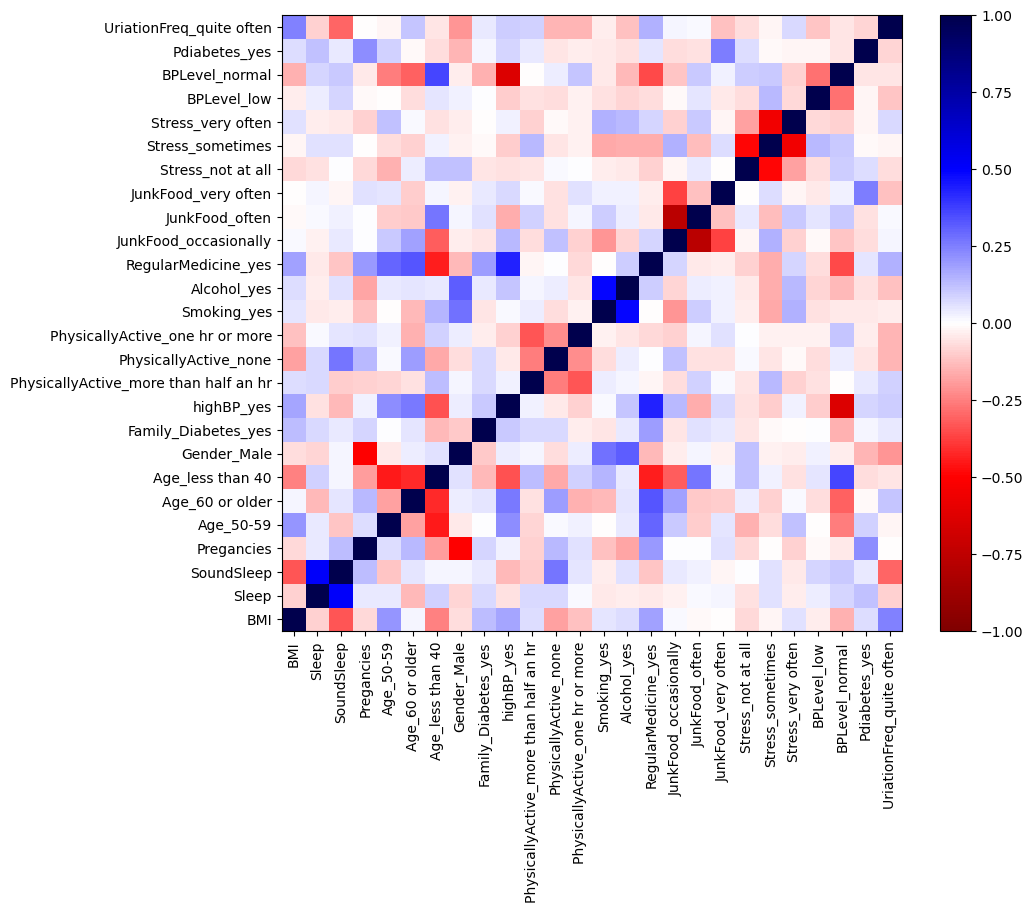

In [286]:
plt.figure(figsize=(10,8))
plt.pcolormesh(corr, vmin=-1, vmax=1, cmap='seismic_r')
plt.xticks(np.arange(corr.shape[1])+.5, corr.columns,rotation=90)
plt.yticks(np.arange(corr.shape[1])+.5, corr.index,rotation=0)
plt.colorbar()

#### A execução completa deste código, a lista "correlated" conterá todos os pares de variáveis que têm uma correlação maior do que 0,7. Isso pode ser útil para identificar variáveis que estão fortemente relacionadas em um conjunto de dados, o que pode afetar análises e modelagem de dados. O código finalmente retorna a lista "correlated" que contém esses pares de variáveis.

In [287]:
# Buscando variáveis que são altamente correlacionadas a nivel maior que 70 %

correlated = []
for num,cat in enumerate(corr.index):
    series = corr.loc[cat].iloc[num+1:]
    cols = series.loc[ series.abs()>0.7 ].index
    for col in cols:
        correlated.append([cat,col])
correlated

[['JunkFood_occasionally', 'JunkFood_often']]

Essa duas variáveis são altamente correlacionadas e podem prejudicar o modelo, sendo assim é necessãrio a exclusão

#### Após o loop, o código retorna a lista "drops", que contém os nomes das variáveis a serem descartadas, ou seja, as variáveis que não são consideradas importantes em relação ao problema de classificação.
#### Este código é útil para selecionar variáveis mais relevantes em um problema de classificação, mantendo aquelas que têm uma importância mútua maior em relação à variável de destino e descartando as menos importantes, especialmente quando há multicolinearidade entre variáveis altamente correlacionadas.

In [288]:
# dropando a variável(s) não importante para o modelo segundo critérios da multicolinearidade 
from sklearn.feature_selection import mutual_info_classif
drops = []
for col1, col2 in correlated:
    info1, info2 = mutual_info_classif(X_tr_encoded[[col1,col2]],y_tr)
    if info1 > info2:
        drops.append( col2 )
    else:
        drops.append( col1 )
drops

['JunkFood_often']

In [289]:
# Criando os dados de treino e teste dropando as variaveis correlacionadas
X_tr_encoded_drop = X_tr_encoded.drop(drops,axis=1)
X_ts_encoded_drop = X_ts_encoded.drop(drops,axis=1)
X_tr_encoded_drop

,BMI,Sleep,SoundSleep,Pregancies,Age_50-59,Age_60 or older,Age_less than 40,Gender_Male,Family_Diabetes_yes,highBP_yes,...,RegularMedicine_yes,JunkFood_occasionally,JunkFood_very often,Stress_not at all,Stress_sometimes,Stress_very often,BPLevel_low,BPLevel_normal,Pdiabetes_yes,UriationFreq_quite often
260,24.0,4,4,3.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
643,33.0,7,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
97,24.0,8,5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
392,33.0,7,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
258,30.0,9,8,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,18.0,6,6,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
529,26.0,8,6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
74,31.0,7,6,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,33.0,8,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Temos os dados de treino e teste sem as variáveis altamente correlacionadas

#### O LogisticRegressionCV serve  para treinar um modelo de regressão logística com validação cruzada incorporada para selecionar o valor ideal do hiperparâmetro de regularização C. Isso é útil para tarefas de classificação onde você deseja um modelo de regressão logística e deseja otimizar a regularização para obter o melhor desempenho do modelo.







LogisticRegressionCV: Esta é a classe do modelo de regressão logística com validação cruzada incorporada. Isso significa que o modelo ajusta a regularização automaticamente através da validação cruzada, selecionando o melhor valor do hiperparâmetro C, que controla a força da regularização.

Cs=100: O argumento Cs é o conjunto de valores para o hiperparâmetro C que o modelo vai considerar durante a validação cruzada. Neste caso, Cs é configurado com 100 valores, o que significa que o modelo avaliará 100 valores diferentes de C para determinar o melhor.

penalty='l1': O argumento penalty define o tipo de regularização a ser aplicada. 'l1' indica regularização L1 (também conhecida como regularização Lasso), que ajuda a selecionar recursos importantes ao forçar alguns coeficientes a zero.

random_state=13: O argumento random_state define a semente do gerador de números aleatórios. Isso garante que o modelo seja reproduzível, ou seja, ele dará os mesmos resultados sempre que for treinado com os mesmos dados.

solver='saga': O argumento solver especifica o algoritmo a ser usado para otimizar a função de custo da regressão logística. 'saga' é um dos solucionadores disponíveis no Scikit-Learn que é adequado para problemas com regularização L1.

max_iter=20_000: O argumento max_iter define o número máximo de iterações que o otimizador utilizará para ajustar o modelo. Neste caso, o limite máximo é definido em 20.000 iterações.









### Nota: 

Lembre-se que como não reescalamos as variáveis numéricas, seus $\beta$ não são comparáveis: 
 - eles podem ser pequenos se a variável tem uma escala grande!

In [301]:
from sklearn.linear_model import LogisticRegressionCV

#criando o modelo

clf = LogisticRegressionCV(Cs=100, penalty='l1',random_state=13, solver='saga', max_iter=20_000)

In [302]:
# treinando o modelo
clf.fit(X_tr_encoded_drop, y_tr)

LogisticRegressionCV(Cs=100, max_iter=20000, penalty='l1', random_state=13,
                     solver='saga')

No geral, esse código é usado para identificar e listar as colunas de características que não têm um impacto significativo na previsão do modelo de regressão logística, com base nos coeficientes calculados. Essas colunas podem ser candidatas à remoção ou à redução de dimensionamento no conjunto de dados, a fim de simplificar o modelo sem perder muita informação preditiva.

In [303]:
# buscando os coeficientes das colunas  e identificando as zerada, ou seja, que não contribua  com o modelo
zero_col = []
for col,coef in zip(X_tr_encoded_drop.columns, clf.coef_[0]):
    print(f'{col:50s}\t{coef:.3f}')
    if np.abs(coef)<=0.001:
        zero_col.append(col)
        
zero_col

BMI                                               	-0.004
Sleep                                             	0.053
SoundSleep                                        	0.048
Pregancies                                        	0.365
Age_50-59                                         	0.000
Age_60 or older                                   	1.723
Age_less than 40                                  	-1.759
Gender_Male                                       	1.097
Family_Diabetes_yes                               	1.092
highBP_yes                                        	0.000
PhysicallyActive_more than half an hr             	0.792
PhysicallyActive_none                             	0.933
PhysicallyActive_one hr or more                   	1.276
Smoking_yes                                       	0.000
Alcohol_yes                                       	0.000
RegularMedicine_yes                               	2.655
JunkFood_occasionally                             	-0.405
JunkFood_very often         

['Age_50-59',
 'highBP_yes',
 'Smoking_yes',
 'Alcohol_yes',
 'JunkFood_very often',
 'Stress_very often']

 as variaveis zeradas e que não contribui com o modelo, sendo assim podem ser excluidas, podemos observar os valore de C_, (valore baixos significa modelos generalizando bem, valore muito altos, temos que tomar cuidado, pode está ocorrendo sobreajuste.

In [304]:
# verificando o C_, o valor alto sinal de alerta!
clf.C_

array([0.91116276])

### Vamos então refazer nossa Regressão Logística, tendo removido as correlações!


In [305]:
clf = LogisticRegression(penalty= None,random_state=61658, max_iter=3_000)

scores = cross_val_score(clf, X_tr_encoded_drop, y_tr, cv=10, scoring='roc_auc')

print(f"O valor médio da AUC foi de {scores.mean():.2f} com devio padrão de {scores.std():.2f}")

O valor médio da AUC foi de 0.94 com devio padrão de 0.04


AUC - 0.9196928635953027


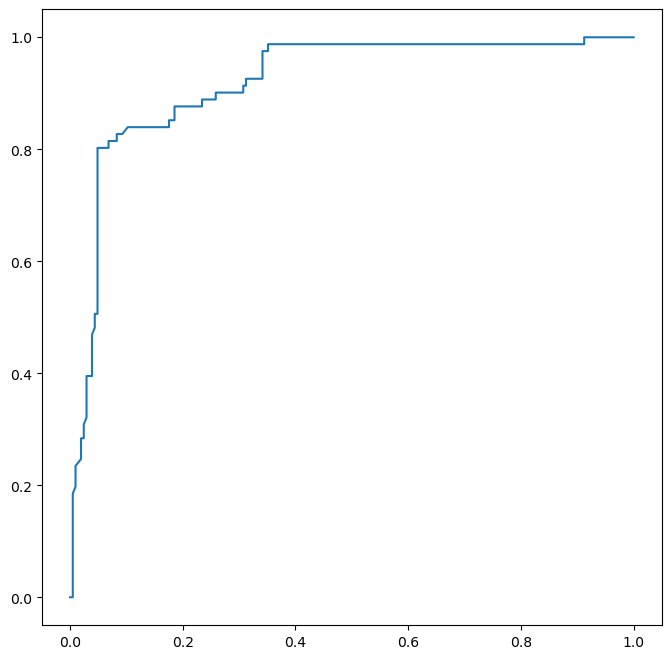

In [306]:
clf.fit(X_tr_encoded_drop, y_tr)

# y_pred = clf.predict(X_ts_encoded_scaled)
y_pred_proba = clf.predict_proba(X_ts_encoded_drop)[:,1]

print('AUC -', roc_auc_score(y_ts, y_pred_proba))

fpr, tpr, ths = roc_curve(y_ts, y_pred_proba)
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.show()

In [307]:
# verificando o C_, o valor alto sinal de alerta! VERIFICAR A VALIDAÇÃO!
clf.C

1.0

In [308]:


# criando o dataframe
y_ts_df_2 = pd.DataFrame(y_ts)

# criando as predições
y_ts_df_2.loc[:,'pred'] = y_pred_proba
y_ts_df_2

,Diabetic,pred
334,1,0.052578
434,0,0.019257
461,1,0.644012
375,0,0.000011
902,0,0.017603
...,...,...
833,0,0.958347
914,0,0.003027
68,1,0.923005
710,1,0.993751


## VALIDANDO O MODELO 

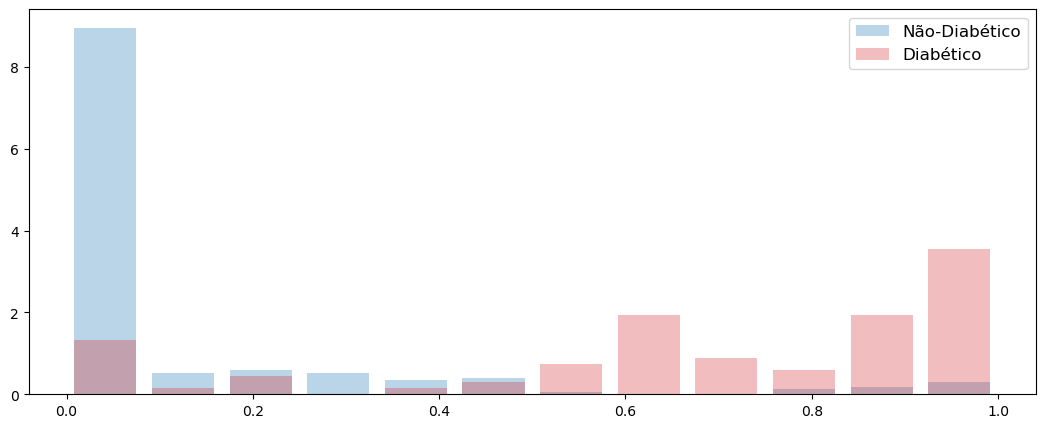

In [309]:
plt.figure(figsize=(13,5))
plt.hist(y_ts_df_2.loc[y_ts_df_2.Diabetic==0].pred,bins=np.linspace(0,1,13), color='C0', alpha=.3, density=True, rwidth=.8,label='Não-Diabético')
plt.hist(y_ts_df_2.loc[y_ts_df_2.Diabetic==1].pred,bins=np.linspace(0,1,13), color='C3', alpha=.3, density=True, rwidth=.8,label='Diabético')
plt.legend(fontsize=12)

Parece que os modelos têm comportamentos muitos parecidos, tanto com regularização quanto sem regularização

In [311]:
# verificando o intercepto de cada variáveis
print(f'Intercepto                                      \t{clf.intercept_[0]:6.3f}')
for col,coef in zip(X_tr_encoded_drop.columns, clf.coef_[0]):
    print(f'{col:50s}\t{coef:6.3f}')

Intercepto                                      	-5.015
BMI                                               	 0.004
Sleep                                             	 0.065
SoundSleep                                        	 0.117
Pregancies                                        	 0.383
Age_50-59                                         	 0.433
Age_60 or older                                   	 2.305
Age_less than 40                                  	-2.025
Gender_Male                                       	 1.913
Family_Diabetes_yes                               	 1.393
highBP_yes                                        	-0.515
PhysicallyActive_more than half an hr             	 1.626
PhysicallyActive_none                             	 1.760
PhysicallyActive_one hr or more                   	 2.121
Smoking_yes                                       	 0.535
Alcohol_yes                                       	-0.525
RegularMedicine_yes                               	 3.402
JunkFood_occasio

## Entendo as variáveis do modelo

- O intercepto é -5,015. Isso significa que se todas as outras variáveis forem iguais a zero, então a probabilidade prevista de ter diabetes é -5,015. Este é um valor negativo, o que significa que o modelo prevê que é menos provável ter diabetes do que não ter diabetes.

- O coeficiente de Pdiabetes_yes, 8.561, indica que um indivíduo com Pdiabetes_yes (pré-diabetes) tem uma probabilidade 8.561 vezes maior de ter diabetes do que um indivíduo com Pdiabetes_no (sem pré-diabetes).

- O coeficiente de RegularMedicine_yes, 3.402, indica que um indivíduo que toma medicamentos regularmente tem uma probabilidade 3.402 vezes maior de ter diabetes do que um indivíduo que não toma medicamentos regularmente.

- O coeficiente de BPLevel_low, -8.349, indica que um indivíduo com pressão arterial baixa tem uma probabilidade -8.349 vezes menor de ter diabetes do que um indivíduo com pressão arterial normal. 

- O coeficiente de Alcohol_yes, -0.525, indica que um indivíduo que ingere álcool tem uma probabilidade -0.525 vezes menor de ter diabetes do que um indivíduo que não ingere álcool. 

- O coeficiente para Idade_60 ou mais é 2,305. Isso significa que para cada aumento de uma unidade em Idade_60 ou mais, a probabilidade prevista de ter diabetes aumenta em 2,305. Este é um valor positivo, o que significa que o modelo prevê que as pessoas que têm 60 anos de idade ou mais são mais propensas a ter diabetes do que as pessoas mais jovens.

- O coeficiente de Pregancies,  0.383, indica que um indivíduo com um ou mais gestações tem uma probabilidade  0.383 vezes maior de ter diabetes do que um indivíduo sem gestações. Em outras palavras, a probabilidade de um indivíduo com um ou mais gestações ter diabetes é de cerca de 38,3%.

Isso significa que a gravidez é um fator de risco para o diabetes. Estudos têm mostrado que o risco de desenvolver diabetes aumenta após a gravidez, mesmo em mulheres que não tinham diabetes antes da gravidez. Isso ocorre porque a gravidez pode causar alterações no corpo que podem levar à resistência à insulina e ao diabetes.

# Interpretando o modelo

De acordo com a informação fornecida, a probabilidade de um indivíduo pertencer à classe 1 (indivíduos com diabetes) é de 0,01% na ausência de qualquer outra variável. Isso significa que, para cada 100.000 indivíduos, apenas 1 indivíduo é esperado ter diabetes na ausência de qualquer outra variável.

Os padrões de indivíduos sem diabetes são aqueles que se afastam dos padrões que são associados ao diabetes. Esses padrões incluem:

- Idade: Indivíduos mais jovens são menos propensos a ter diabetes do que indivíduos mais velhos.

- Sexo: Indivíduos do sexo masculino são mais propensos a ter diabetes do que indivíduos do sexo feminino.

- História familiar: Indivíduos com histórico familiar de diabetes são mais propensos a ter diabetes.

- Fatores de risco comportamentais: Indivíduos com fatores de risco comportamentais, como obesidade, sedentarismo e má alimentação, são mais propensos a ter diabetes.

Portanto, indivíduos sem diabetes são mais propensos a:

Ser mais jovens.

Ser do sexo feminino.

Não ter histórico familiar de diabetes.

Não ter fatores de risco comportamentais.

Aqui estão alguns exemplos específicos de padrões de indivíduos sem diabetes:

- Indivíduos com idade inferior a 40 anos são muito menos propensos a ter diabetes do que indivíduos com idade superior a 60 anos.
- Indivíduos do sexo feminino são cerca de 20% menos propensos a ter diabetes do que indivíduos do sexo masculino.
- Indivíduos sem histórico familiar de diabetes são cerca de 50% menos propensos a ter diabetes do que indivíduos com histórico familiar de diabetes.
- Indivíduos com Índice de Massa Corporal (IMC) inferior a 25 são menos propensos a ter diabetes do que indivíduos com IMC superior a 30.
- Indivíduos que praticam atividade física regularmente são menos propensos a ter diabetes do que indivíduos que são sedentários.
- Indivíduos que seguem uma dieta saudável são menos propensos a ter diabetes do que indivíduos que seguem uma dieta não saudável.